In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r3/title_r3_0.625k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 625 drug-target pairs
encoding drug...
unique drugs: 622
encoding protein...
unique target sequence: 337
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 48.6292. Total time 0.0 hours
Validation at Epoch 1 with loss:44.5950, MSE: 44.5950 , Pearson Correlation: 0.10136 with p-value: 4.33E-01 , Concordance Index: 0.54285
Training at Epoch 2 iteration 0 with loss 44.6177. Total time 0.00027 hours
Validation at Epoch 2 with loss:15.3666, MSE: 15.3666 , Pearson Correlation: 0.07650 with p-value: 5.55E-01 , Concordance Index: 0.54550
Training at Epoch 3 iteration 0 with loss 14.4952. Total time 0.00055 hours
Validation at Epoch 3 with loss:22.8387, MSE: 22.8387 , Pearson Correlation: 0.08481 with p-value: 5.12E-01 , Concordance Index: 0.54074
Training at Epoch 4 iteration 0 with loss 22.9603. Total time 0.00083 hours
Validation at Epoch 4 with loss:3.36960, MSE: 3.36960 , Pearson Correlation: 0.09120 with p-value: 4.81E-01 , Concordance Index: 0.54391
Training at Epoch 5 iteration 0 with loss 3.25844. Total time 0.00111 hours
Validation

Training at Epoch 39 iteration 0 with loss 2.13789. Total time 0.0125 hours
Validation at Epoch 39 with loss:1.79566, MSE: 1.79566 , Pearson Correlation: 0.41437 with p-value: 8.13E-04 , Concordance Index: 0.64285
Training at Epoch 40 iteration 0 with loss 2.03761. Total time 0.01277 hours
Validation at Epoch 40 with loss:1.78748, MSE: 1.78748 , Pearson Correlation: 0.41755 with p-value: 7.34E-04 , Concordance Index: 0.64232
Training at Epoch 41 iteration 0 with loss 2.12034. Total time 0.01333 hours
Validation at Epoch 41 with loss:1.79451, MSE: 1.79451 , Pearson Correlation: 0.42030 with p-value: 6.71E-04 , Concordance Index: 0.64444
Training at Epoch 42 iteration 0 with loss 2.02319. Total time 0.01361 hours
Validation at Epoch 42 with loss:1.80028, MSE: 1.80028 , Pearson Correlation: 0.42320 with p-value: 6.10E-04 , Concordance Index: 0.64656
Training at Epoch 43 iteration 0 with loss 2.15247. Total time 0.01416 hours
Validation at Epoch 43 with loss:1.81320, MSE: 1.81320 , Pearson

Validation at Epoch 77 with loss:1.54334, MSE: 1.54334 , Pearson Correlation: 0.39618 with p-value: 1.43E-03 , Concordance Index: 0.63862
Training at Epoch 78 iteration 0 with loss 1.53961. Total time 0.02805 hours
Validation at Epoch 78 with loss:1.54246, MSE: 1.54246 , Pearson Correlation: 0.39567 with p-value: 1.46E-03 , Concordance Index: 0.63756
Training at Epoch 79 iteration 0 with loss 1.53453. Total time 0.02833 hours
Validation at Epoch 79 with loss:1.54849, MSE: 1.54849 , Pearson Correlation: 0.39606 with p-value: 1.44E-03 , Concordance Index: 0.63703
Training at Epoch 80 iteration 0 with loss 1.46789. Total time 0.02861 hours
Validation at Epoch 80 with loss:1.54533, MSE: 1.54533 , Pearson Correlation: 0.39564 with p-value: 1.46E-03 , Concordance Index: 0.63650
Training at Epoch 81 iteration 0 with loss 1.54064. Total time 0.02916 hours
Validation at Epoch 81 with loss:1.53998, MSE: 1.53998 , Pearson Correlation: 0.39607 with p-value: 1.44E-03 , Concordance Index: 0.63597
Tr

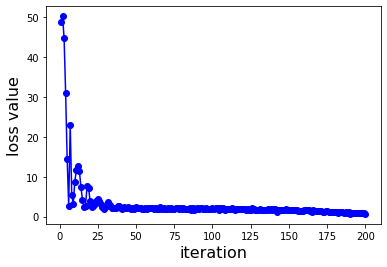

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r3/model_r3_0.625k_100epochs')